In [55]:
import time
import os, fnmatch
import numpy as np
import tensorflow as tf
import keras
import matplotlib
import matplotlib.pyplot as plt
from __future__ import print_function

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input, InputLayer
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D, Conv2DTranspose, BatchNormalization, UpSampling2D, ZeroPadding2D
from keras.regularizers import l2
from keras.layers.advanced_activations import LeakyReLU
import numpy.random as rand
print(matplotlib.__version__)

2.1.0


In [56]:
# create a list, result, of all file names
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

result = find('*.jpg', 'lfwfaces')
print("Number of images: " + str(len(result)))
print("Example file name: " + result[0])

Number of images: 100
Example file name: lfwfaces/Adrian_Murrell_0001.jpg


In [57]:
y_train = []

for i in range(len(result)):
    img = load_img(result[i])
    img = img_to_array(img)
    
    # convert from (250, 250, 3) to (256, 256, 3)
    new_img = []
    for j in range(250):
        arr = [[0, 0, 0]]
        arr = np.array(arr)

        vec = np.append(img[j], arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        new_img.append(vec)

    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img = np.array(new_img)
    
    img = (new_img - 127.5) / 127.5
    y_train.append(img)
    
y_train = np.array(y_train)
print(y_train.shape)

(100, 256, 256, 3)


In [58]:
# convert all to_gray

def to_gray(arr):
    output = []
    for img in arr:
        output_img = tf.image.rgb_to_grayscale(img)
        sess = tf.Session()
        with sess.as_default():
            output_img = output_img.eval()
        output.append(output_img)
            
    return output

x_train = to_gray(y_train)

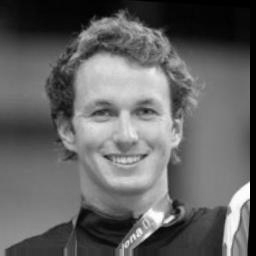

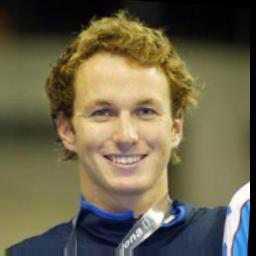

In [59]:
display(array_to_img(x_train[53]))
display(array_to_img(y_train[53]))

In [60]:
x_train = np.array(x_train)

In [61]:
# model

model = Sequential()

# model.add(InputLayer(input_shape=(None, None, 1)))
model.add(InputLayer(input_shape=(256, 256, 1)))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
__________

In [62]:
model.compile(optimizer='rmsprop', loss='mse')
model.fit(x = x_train, y = y_train, batch_size=1, epochs=10)

Epoch 1/10
100/100 [==============================] - 19s 194ms/step - loss: 0.0796
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 0.0464
Epoch 3/10
100/100 [==============================] - 17s 169ms/step - loss: 0.0389
Epoch 4/10
100/100 [==============================] - 16s 164ms/step - loss: 0.0352
Epoch 5/10
100/100 [==============================] - 17s 170ms/step - loss: 0.0337
Epoch 6/10
100/100 [==============================] - 18s 175ms/step - loss: 0.03220s - loss: 0.03
Epoch 7/10
100/100 [==============================] - 17s 171ms/step - loss: 0.0299
Epoch 8/10
100/100 [==============================] - 16s 156ms/step - loss: 0.0300
Epoch 9/10
100/100 [==============================] - 15s 154ms/step - loss: 0.0297
Epoch 10/10
100/100 [==============================] - 16s 159ms/step - loss: 0.0278


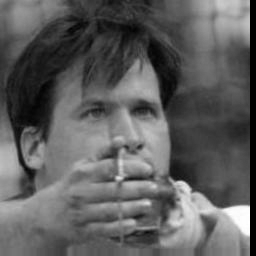

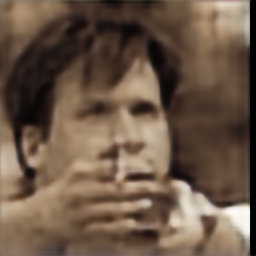

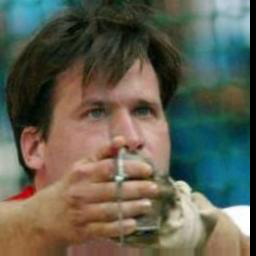

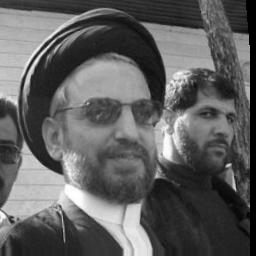

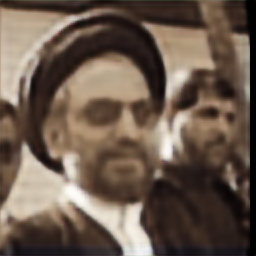

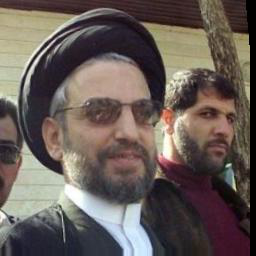

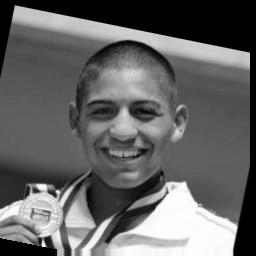

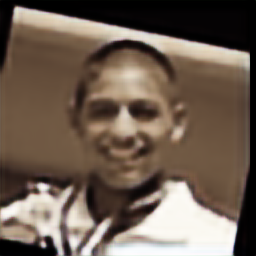

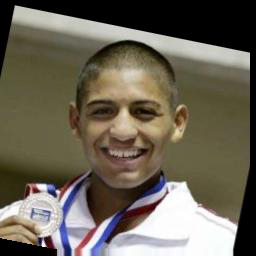

In [63]:
output = model.predict(x_train)

for i in range(3):
    x1 = rand.randint(x_train.shape[0])
    
    display(array_to_img(x_train[x1]))
    display(array_to_img(output[x1]))
    display(array_to_img(y_train[x1]))
    print(" "*1000)